# Preprocessing the Data

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import numpy as np


In [2]:
# Loading data
file_path = Path("Resources/combined_data.csv")
combined_df = pd.read_csv(file_path)
combined_df.head()

,Year,Quarter,Fraud Reporting Count,Net Operating Income(Billions),Lagged Fraud Reporting Count,Lagged Net Operating Income(Billions)
0,2014,1,82364,36.8,NaN,NaN
1,2014,2,95516,39.8,82364.0,36.8
2,2014,3,94084,38.1,95516.0,39.8
3,2014,4,90868,36.0,94084.0,38.1
4,2015,1,90566,39.0,90868.0,36.0


In [3]:
combined_df.dropna(inplace=True)
combined_df

,Year,Quarter,Fraud Reporting Count,Net Operating Income(Billions),Lagged Fraud Reporting Count,Lagged Net Operating Income(Billions)
1,2014,2,95516,39.8,82364.0,36.8
2,2014,3,94084,38.1,95516.0,39.8
3,2014,4,90868,36.0,94084.0,38.1
4,2015,1,90566,39.0,90868.0,36.0
5,2015,2,96365,42.6,90566.0,39.0
6,2015,3,101745,40.0,96365.0,42.6
7,2015,4,105491,40.1,101745.0,40.0
8,2016,1,108801,38.4,105491.0,40.1
9,2016,2,128668,42.9,108801.0,38.4
10,2016,3,126907,45.1,128668.0,42.9


In [4]:
# slice features and target
x = combined_df.drop(columns=['Fraud Reporting Count', 'Quarter'])
y = combined_df[["Fraud Reporting Count"]]
display(x.head())
display(y.head())

,Year,Net Operating Income(Billions),Lagged Fraud Reporting Count,Lagged Net Operating Income(Billions)
1,2014,39.8,82364.0,36.8
2,2014,38.1,95516.0,39.8
3,2014,36.0,94084.0,38.1
4,2015,39.0,90868.0,36.0
5,2015,42.6,90566.0,39.0


,Fraud Reporting Count
1,95516
2,94084
3,90868
4,90566
5,96365


In [5]:
#Slicing data into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)
x_train.shape

(23, 4)

In [6]:
#Scaling data
scaler = StandardScaler()
x_scaler = scaler.fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)



In [7]:
y_train.shape

(23, 1)

In [8]:
y_test.shape

(8, 1)

In [9]:
#Scaling y data
y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Fitting the Random Forest Model

In [10]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)


In [15]:
# Fitting the model
rf_model = rf_model.fit(x_train_scaled, y_train_scaled.ravel())

## Making Predictions Using the Random Forest Model

In [16]:
# Making predictions using the testing data
predictions = rf_model.predict(x_train_scaled)
predicted = np.concatenate((predictions, rf_model.predict(x_test_scaled)))
predicted


array([-0.49022459,  1.17090867,  0.04895294, -0.44232894,  0.82752696,
       -0.87818141, -0.97466745,  1.26631328, -0.76492371, -0.38947756,
       -0.61675731,  1.65845224, -0.90565826, -0.10820836, -0.93066071,
       -0.24632676,  2.06521256,  2.06962124, -0.40757072, -0.45811526,
       -0.44365045, -0.47922682, -0.81384005,  1.56656277, -0.90972178,
        0.58989606,  0.85134706,  0.52928747,  0.58681309,  0.67159503,
        0.04135166])

In [22]:
predicted_output = y_scaler.inverse_transform(predicted)
predicted_output

array([119257.252, 209555.16 , 148566.522, 121860.822, 190889.198,
        98168.222,  92923.316, 214741.28 , 104324.822, 124733.782,
       112379.032, 236057.648,  96674.602, 140023.356,  95315.488,
       132515.348, 258168.822, 258408.474, 123750.252, 121002.69 ,
       121788.986, 119855.082, 101665.768, 231062.608,  96453.712,
       177971.768, 192184.04 , 174677.132, 177804.18 , 182412.86 ,
       148153.322])

<AxesSubplot:>

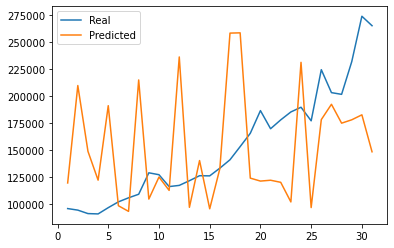

In [25]:
# Create a DataFrame of Real and Predicted values
results = pd.DataFrame({
    "Real": combined_df["Fraud Reporting Count"],
    "Predicted": predicted_output.ravel()
}, index = combined_df.index) 
results.head()
results.plot()